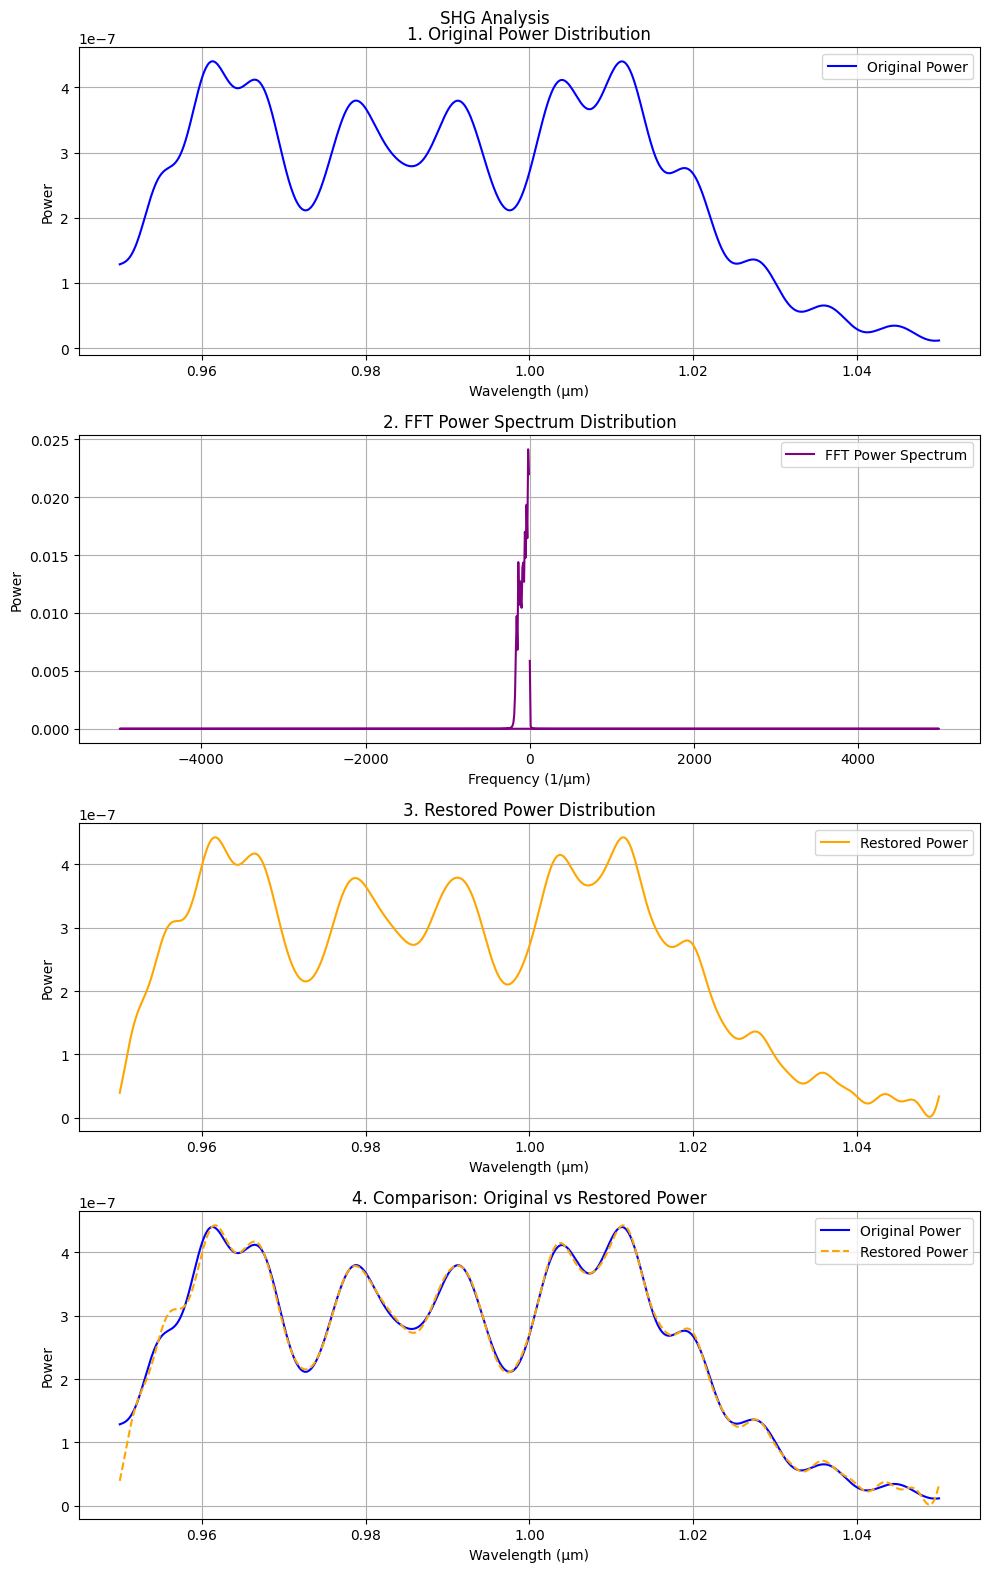

In [54]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from syuron import shg, mgoslt, pp

chirped_superlattice = pp.chirped(100, [3.6], 1.031E-05, [0.001])
fixed_superlattice = pp.fixed(100, [3.6], 1.031E-05)
random_superlattice = pp.random(1, 100, 1.031E-05, 3.4, 3.6)

wavelengths = jnp.linspace(0.95, 1.05, 1000).tolist()
delta_wavelength = wavelengths[1] - wavelengths[0]

params = shg.Params(
    superlattice_dim=chirped_superlattice,
    T_dim=70,
    wavelength_dim=wavelengths,
    fund_power_dim=1,
    sh_power_dim=0,
)

eff_tensor = mgoslt.analyze(params)
eff_complex = eff_tensor[0, 0, :, 0, 0]

original_power = jnp.abs(eff_complex)**2

fft_result = jnp.fft.fft(eff_complex)
fft_power_spectrum = jnp.abs(fft_result)**2
freqs = jnp.fft.fftfreq(len(wavelengths), d=delta_wavelength)

num_top_components = 30
sorted_indices = jnp.argsort(jnp.abs(fft_result))[::-1]
mask = jnp.zeros_like(fft_result)
mask = mask.at[sorted_indices[:num_top_components]].set(1.0)
fft_reduced = fft_result * mask

restored_complex = jnp.fft.ifft(fft_reduced)
restored_power = jnp.abs(restored_complex)**2

fig, (ax_original, ax_fft, ax_restored,
      ax_comparison) = plt.subplots(4, 1, figsize=(10, 16))
fig.suptitle("SHG Analysis")

ax_original.plot(wavelengths, original_power,
                 color='blue', label="Original Power")
ax_original.set_xlabel("Wavelength (μm)")
ax_original.set_ylabel("Power")
ax_original.set_title("1. Original Power Distribution")
ax_original.legend()
ax_original.grid(True)

ax_fft.plot(freqs, fft_power_spectrum, color='purple',
            label="FFT Power Spectrum")
ax_fft.set_xlabel("Frequency (1/μm)")
ax_fft.set_ylabel("Power")
ax_fft.set_title("2. FFT Power Spectrum Distribution")
ax_fft.legend()
ax_fft.grid(True)

ax_restored.plot(wavelengths, restored_power,
                 color='orange', label="Restored Power")
ax_restored.set_xlabel("Wavelength (μm)")
ax_restored.set_ylabel("Power")
ax_restored.set_title("3. Restored Power Distribution")
ax_restored.legend()
ax_restored.grid(True)

ax_comparison.plot(wavelengths, original_power,
                   color='blue', label="Original Power")
ax_comparison.plot(wavelengths, restored_power, color='orange',
                   linestyle='--', label="Restored Power")
ax_comparison.set_xlabel("Wavelength (μm)")
ax_comparison.set_ylabel("Power")
ax_comparison.set_title("4. Comparison: Original vs Restored Power")
ax_comparison.legend()
ax_comparison.grid(True)

fig.tight_layout()
plt.show()

データセットの入力の作成完了
計算が終了


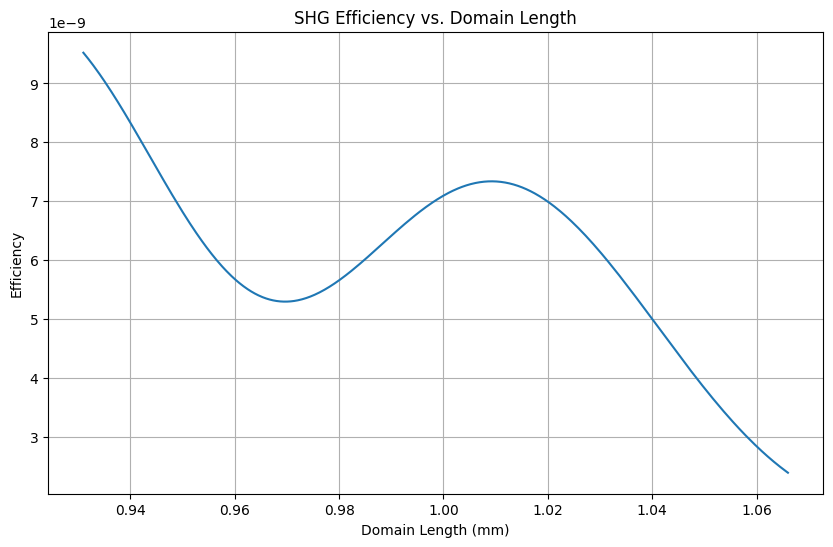

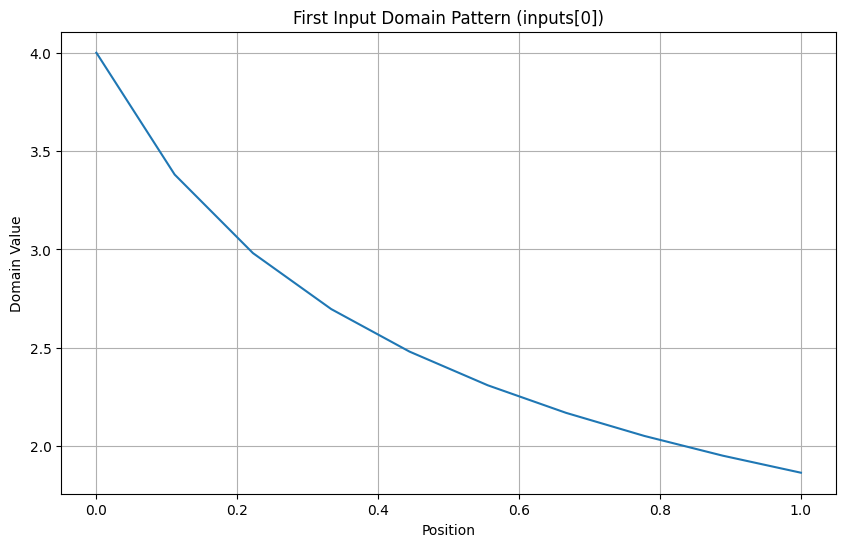

inputs shape: (100, 1000), outputs shape: (100, 10)
[(array([2.52359627e-08, 2.53139412e-08, 2.53908983e-08, 2.54678660e-08,
       2.55435495e-08, 2.56183164e-08, 2.56927670e-08, 2.57657007e-08,
       2.58378723e-08, 2.59087862e-08, 2.59801638e-08, 2.60502304e-08,
       2.61187960e-08, 2.61875215e-08, 2.62542681e-08, 2.63212989e-08,
       2.63866884e-08, 2.64519127e-08, 2.65153979e-08, 2.65782525e-08,
       2.66403166e-08, 2.67021303e-08, 2.67616826e-08, 2.68216098e-08,
       2.68798743e-08, 2.69374922e-08, 2.69939822e-08, 2.70504561e-08,
       2.71056173e-08, 2.71591372e-08, 2.72121916e-08, 2.72645284e-08,
       2.73157799e-08, 2.73657896e-08, 2.74154157e-08, 2.74635017e-08,
       2.75114882e-08, 2.75577197e-08, 2.76033951e-08, 2.76483245e-08,
       2.76916534e-08, 2.77342895e-08, 2.77763856e-08, 2.78172845e-08,
       2.78570980e-08, 2.78960837e-08, 2.79340266e-08, 2.79707795e-08,
       2.80071166e-08, 2.80420931e-08, 2.80760144e-08, 2.81092145e-08,
       2.81411996e-08, 

In [ ]:
from syuron import shg
import jax.numpy as jnp
from syuron import pp
from syuron import mgoslt
from workspace import path
import matplotlib.pyplot as plt
import tensorflow as tf

num_start_width = 10
num_chirp_rate = 10
num_domains = 10
num_samples = num_chirp_rate * num_start_width
chirped_superlattice = pp.chirped(num_domains, jnp.linspace(
    3, 4, num_start_width).tolist(), 1.031E-05, jnp.linspace(0.01, 0.05, num_chirp_rate).tolist())

print("データセットの入力の作成完了")

wavelength_dim = jnp.linspace(0.931, 1.066, 1000).tolist()

params = shg.Params(
    superlattice_dim=chirped_superlattice,
    T_dim=70,
    wavelength_dim=wavelength_dim,
    fund_power_dim=1,
    sh_power_dim=0,
    mesh_density=100
)

eff_tensor = mgoslt.analyze(params)

print("計算が終了")

example_index = 100

# 代表的なデータの可視化
example_eff = eff_tensor[example_index, 0, :, 0, 0].tolist()
plt.figure(figsize=(10, 6))
plt.plot(wavelength_dim, example_eff)
plt.xlabel('Domain Length (mm)')
plt.ylabel('Efficiency')
plt.title('SHG Efficiency vs. Domain Length')
plt.grid(True)
plt.show()


# 代表的なグレーティング周期の可視化
x_axis = jnp.linspace(0, 1, num_domains).tolist()
plt.figure(figsize=(10, 6))
# Plot the first input domain pattern
plt.plot(x_axis, chirped_superlattice[example_index, :, 0])
plt.xlabel('Position')
plt.ylabel('Domain Value')
plt.title('First Input Domain Pattern (inputs[0])')
plt.grid(True)
plt.show()

eff_spectrums = eff_tensor[:, 0, :, 0, 0]
superlattices = chirped_superlattice[:, :, 0]
print(
    f"inputs shape: {eff_spectrums.shape}, outputs shape: {superlattices.shape}")

dataset = tf.data.Dataset.from_tensor_slices((eff_spectrums, superlattices))
output_path = path.Path("research/syuron/dataset/chirped.tfrecord").abs()
# dataset.save(output_path)

2025-03-18 09:11:34.313556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742289094.339912   80206 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742289094.347884   80206 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742289094.367233   80206 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742289094.367255   80206 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742289094.367257   80206 computation_placer.cc:177] computation placer alr

データセットの入力の作成完了
計算が終了


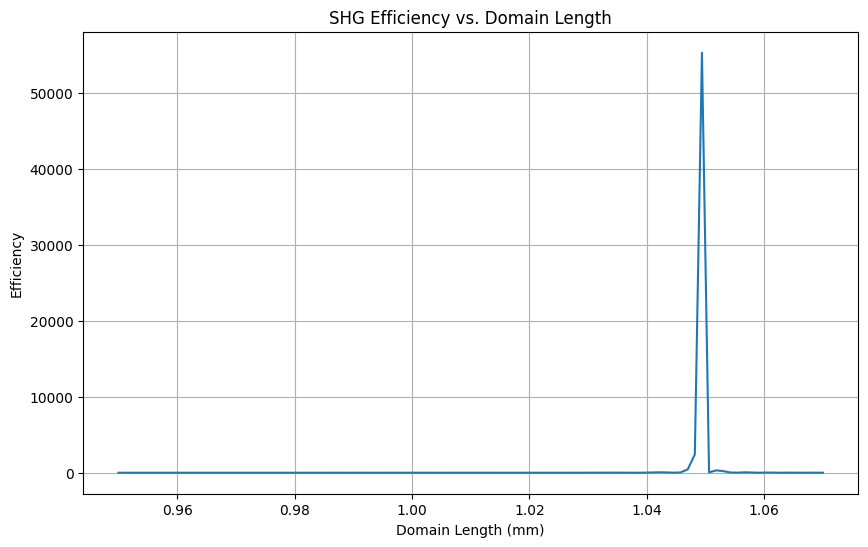

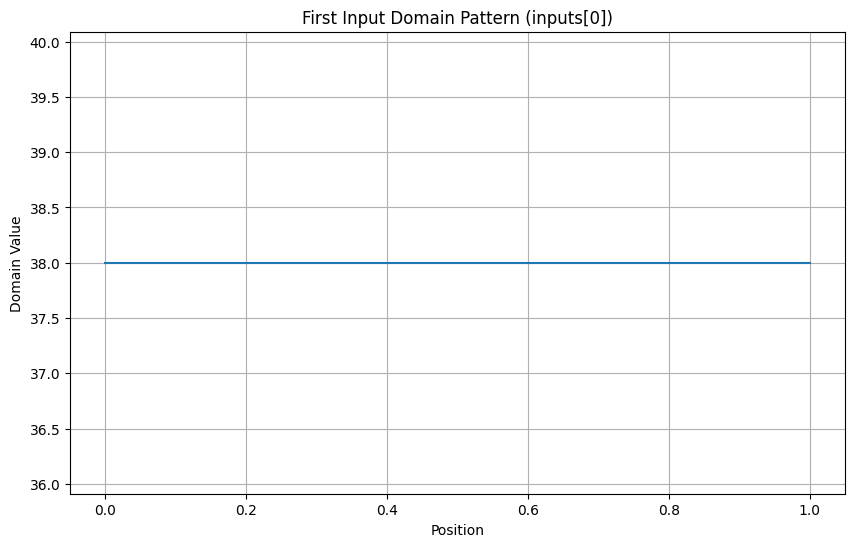

inputs shape: (10000, 100), outputs shape: (10000, 1000)
[(array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
     

In [ ]:
from syuron import shg
import jax.numpy as jnp
from syuron import pp
from syuron import mgoslt
from workspace import path
import matplotlib.pyplot as plt
import tensorflow as tf

num_samples = 10000
width_dim = jnp.linspace(3, 3.8, num_samples).tolist()
num_domains = 1000
chirped_superlattice = pp.fixed(num_domains, width_dim, 1.031E-05)

print("データセットの入力の作成完了")

wavelength_dim = jnp.linspace(0.95, 1.07, 100).tolist()

params = shg.Params(
    superlattice_dim=chirped_superlattice,
    T_dim=70,
    wavelength_dim=wavelength_dim,
    fund_power_dim=1,
    sh_power_dim=0,
    mesh_density=100
)

eff_tensor = mgoslt.analyze(params)

# 学習のために出力をスケーリング
eff_tensor = eff_tensor * 1e8
chirped_superlattice = chirped_superlattice * 10

print("計算が終了")

# example_index = 0
example_index = num_samples

# 代表的なデータの可視化
example_eff = eff_tensor[example_index, 0, :, 0, 0].tolist()
plt.figure(figsize=(10, 6))
plt.plot(wavelength_dim, example_eff)
plt.xlabel('Domain Length (mm)')
plt.ylabel('Efficiency')
plt.title('SHG Efficiency vs. Domain Length')
plt.grid(True)
plt.show()

# 代表的なグレーティング周期の可視化
example_domain = chirped_superlattice[example_index, :, 0]
x_axis = jnp.linspace(0, 1, num_domains).tolist()
plt.figure(figsize=(10, 6))
plt.plot(x_axis, example_domain)  # Plot the first input domain pattern
plt.xlabel('Position')
plt.ylabel('Domain Value')
plt.title('First Input Domain Pattern (inputs[0])')
plt.grid(True)
plt.show()

eff_spectrums = eff_tensor[:, 0, :, 0, 0]
superlattices = chirped_superlattice[:, :, 0]
print(
    f"inputs shape: {eff_spectrums.shape}, outputs shape: {superlattices.shape}")

# dataset = tf.data.Dataset.from_tensor_slices((eff_spectrums, superlattices))
dataset = tf.data.Dataset.from_tensor_slices((superlattices, eff_spectrums))
output_path = path.Path("research/syuron/dataset/fixed.tfrecord").abs()
# dataset.save(output_path)